In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

from sklearn.cluster import KMeans, k_means
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

# Folder
folder = './training/Final/'

file =  folder + 'dataset.csv'

%matplotlib inline

In [2]:
frame = pd.read_csv(file, sep='|')
frame.head()

,content,industries,location,title,type_empl,url,wage,suburb,experiences,title_left_over
0,Public Safety Business Agency / Kedron Tempora...,Information & Communication Technology,Brisbane,DA,Permanent,https://www.seek.com.au/job/39018343?type=stan...,85572.0,Northern Suburbs,General,Data Analyst
1,Fantastic working culture Flexible work enviro...,Information & Communication Technology,Brisbane,SDA,Contract,https://www.seek.com.au/job/39007973?type=stan...,99961.0,CBD & Inner Suburbs,Senior,Senior Business Analyst
2,CBD Location 12 month contract Join this State...,Information & Communication Technology,Brisbane,DA,Contract,https://www.seek.com.au/job/38912693?type=stan...,174590.0,CBD & Inner Suburbs,General,Database Analyst
3,CBD Location Initial 3 month contract Join thi...,Information & Communication Technology,Brisbane,DA,Contract,https://www.seek.com.au/job/39037731?type=stan...,177450.0,CBD & Inner Suburbs,General,Data Analyst
4,CBD Location! Initial contract through till en...,Information & Communication Technology,Brisbane,SDA,Contract,https://www.seek.com.au/job/39003265?type=stan...,173550.0,CBD & Inner Suburbs,Senior,Senior Test Analyst


In [3]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 10 columns):
content            1569 non-null object
industries         1569 non-null object
location           1569 non-null object
title              1569 non-null object
type_empl          1569 non-null object
url                1569 non-null object
wage               1569 non-null float64
suburb             1569 non-null object
experiences        1569 non-null object
title_left_over    1569 non-null object
dtypes: float64(1), object(9)
memory usage: 122.7+ KB


In [4]:
frame.drop(columns=['content','experiences','title_left_over','url','suburb'] ,axis=1, inplace=True)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 5 columns):
industries    1569 non-null object
location      1569 non-null object
title         1569 non-null object
type_empl     1569 non-null object
wage          1569 non-null float64
dtypes: float64(1), object(4)
memory usage: 61.4+ KB


In [5]:
frame['industries'].value_counts()

Information & Communication Technology    900
Banking & Financial Services              133
Accounting                                124
Marketing & Communications                106
Science & Technology                       72
Government & Defence                       59
Manufacturing, Transport & Logistics       53
Consulting & Strategy                      49
Sales                                      43
Insurance & Superannuation                 30
Name: industries, dtype: int64

In [6]:
frame

,industries,location,title,type_empl,wage
0,Information & Communication Technology,Brisbane,DA,Permanent,85572.0
1,Information & Communication Technology,Brisbane,SDA,Contract,99961.0
2,Information & Communication Technology,Brisbane,DA,Contract,174590.0
3,Information & Communication Technology,Brisbane,DA,Contract,177450.0
4,Information & Communication Technology,Brisbane,SDA,Contract,173550.0
5,Information & Communication Technology,Brisbane,DA,Contract,204750.0
6,Information & Communication Technology,Brisbane,SDA,Permanent,135000.0
7,Information & Communication Technology,Brisbane,DA,Contract,25220.0
8,Information & Communication Technology,Brisbane,DA,Contract,202800.0
9,Information & Communication Technology,Brisbane,DA,Permanent,114999.0


In [7]:
# frame = frame[frame['wage'] > 10000]
# frame.info()

Text(0.5,0.98,'Distributions of content over the year')

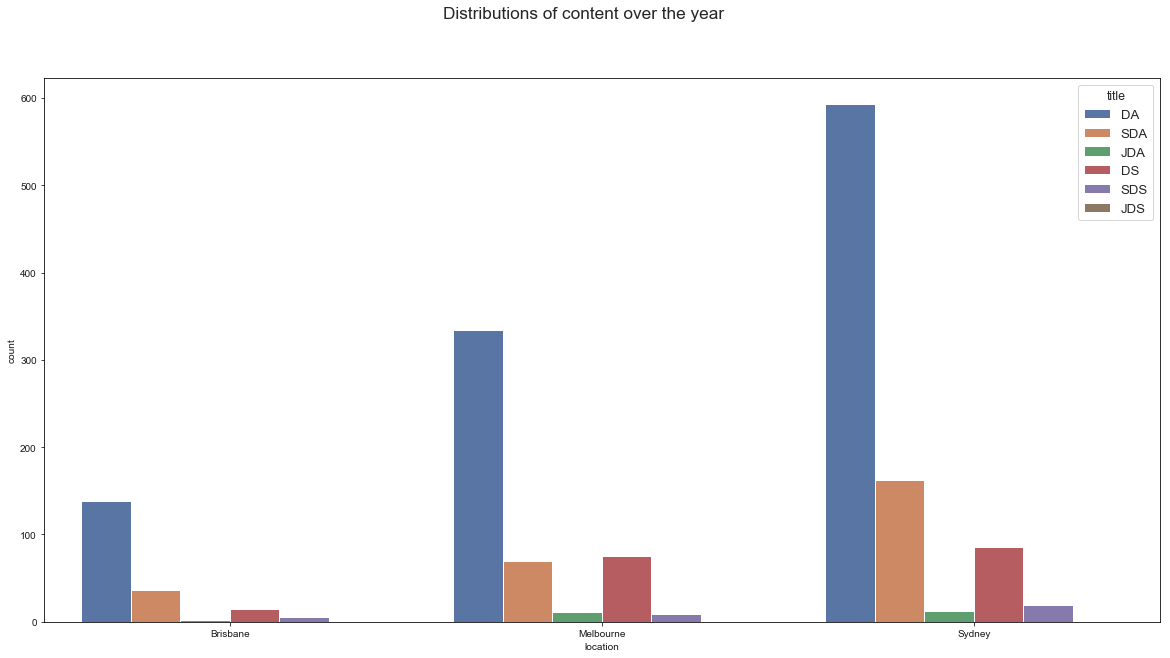

In [8]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.set(style="whitegrid", color_codes=True, font_scale=1.2)
# sns.countplot(x='year', data=df_datetime, orient='h')
sns.countplot(x='location',hue='title', data=frame, orient='h')
fig.suptitle('Distributions of content over the year')
# sns.barplot(x='title',y='wage',data=frame)

Text(0.5,0.98,'Length of text for each title')

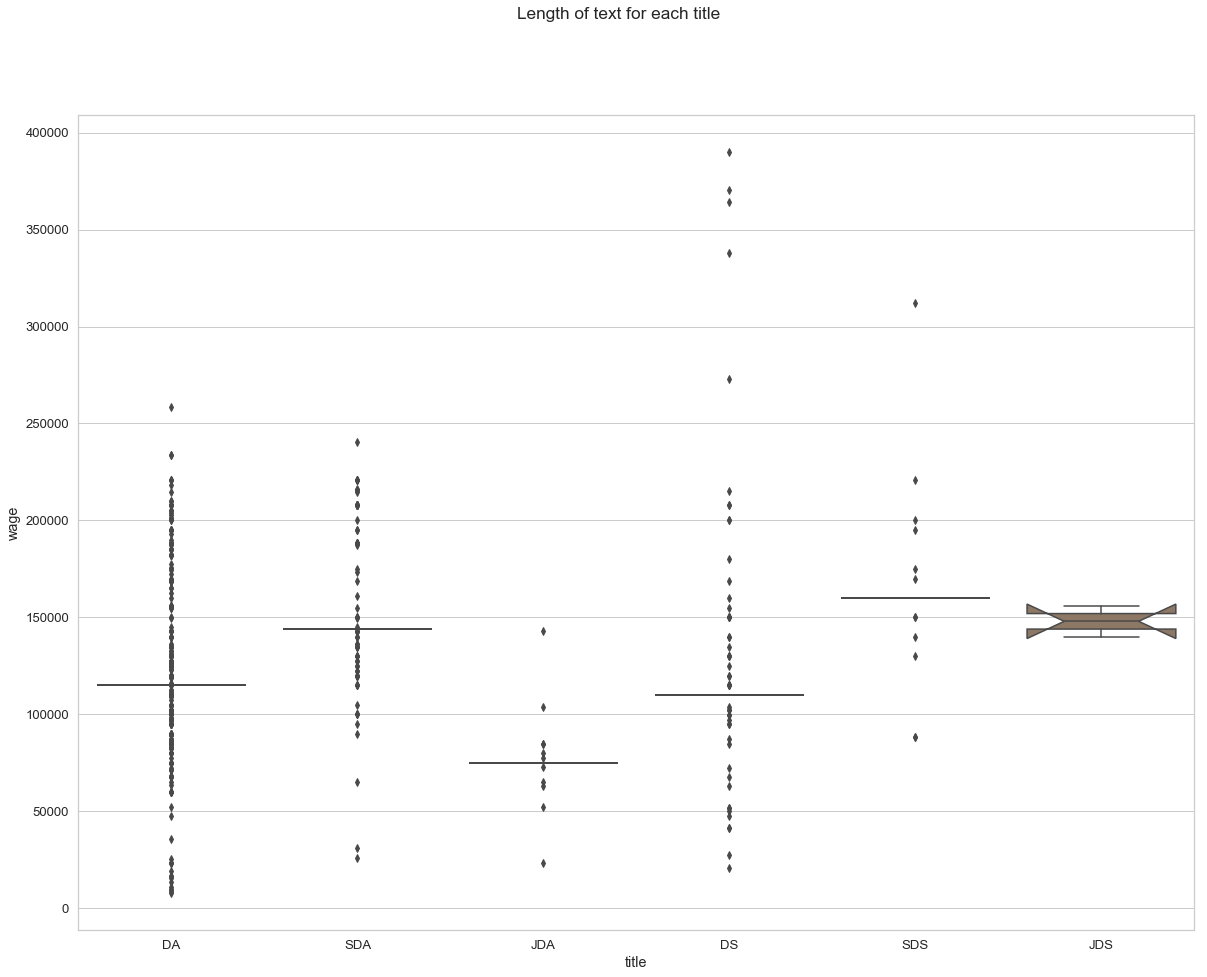

In [9]:
fig, ax = plt.subplots(1,1, figsize=(20,15))
sns.boxplot(x='title' , y='wage', data=frame, orient='v',notch=True)
fig.suptitle('Length of text for each title')

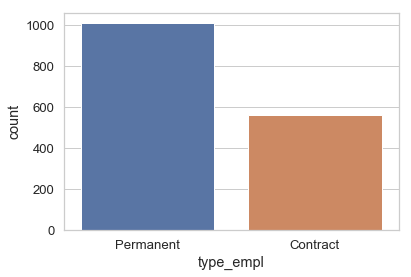

In [10]:
sns.countplot(x='type_empl',data=frame)

In [11]:
frame['type_empl'].value_counts(normalize=True).max()*100

64.308476736775

In [12]:
y = frame['wage'].values
df_dummies = frame.copy()
df_dummies.drop(labels=['wage'],axis=1,inplace=True)
X = pd.get_dummies(df_dummies, prefix=df_dummies.columns, columns=df_dummies.columns)

In [13]:
y_temp = pd.DataFrame(y,columns=['wage'])
df_temp = pd.concat([X,y_temp])
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138 entries, 0 to 1568
Data columns (total 22 columns):
industries_Accounting                                1569 non-null float64
industries_Banking & Financial Services              1569 non-null float64
industries_Consulting & Strategy                     1569 non-null float64
industries_Government & Defence                      1569 non-null float64
industries_Information & Communication Technology    1569 non-null float64
industries_Insurance & Superannuation                1569 non-null float64
industries_Manufacturing, Transport & Logistics      1569 non-null float64
industries_Marketing & Communications                1569 non-null float64
industries_Sales                                     1569 non-null float64
industries_Science & Technology                      1569 non-null float64
location_Brisbane                                    1569 non-null float64
location_Melbourne                                   1569 non-null f

C:\Users\Shaynie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 )
X_train.shape, X_test.shape

((1176, 21), (393, 21))

## Linear

In [15]:
lm = LinearRegression()
lm_model = lm.fit(X_train,y_train)
m = lm_model.coef_[0]
b = lm_model.intercept_

print("formula: y = {}x + {}".format(m,b))

formula: y = 1.4364557053118966e+18x + -9.634067524513705e+17


In [16]:
y_pred = lm_model.predict(X_test)
print("Our score: ", lm_model.score(X_test, y_test))
print("Variance score: ", r2_score(y_test, y_pred))
print("Mean square error: ",mean_squared_error(y_test, y_pred))

Our score:  0.19481172290148907
Variance score:  0.19481172290148907
Mean square error:  551175605.346056


In [17]:
y_test.shape, y_pred.shape

((393,), (393,))

In [18]:
ss = StandardScaler()
Xs = ss.fit_transform(X.values)

C:\Users\Shaynie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Shaynie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25 )
X_train.shape, X_test.shape

((1176, 21), (393, 21))

In [20]:
lm2 = LinearRegression()
lm2_model = lm.fit(X_train,y_train)
m = lm2_model.coef_[0]
b = lm2_model.intercept_

print("formula: y = {}x + {}".format(m,b))
y_pred = lm2_model.predict(X_test)
print("Our score: ", lm2_model.score(X_test, y_test))
print("Variance score: ", r2_score(y_test, y_pred))
print("Mean square error: ",mean_squared_error(y_test, y_pred))

formula: y = 4.397728724018863e+16x + 122505.99659863945
Our score:  0.21840196165004466
Variance score:  0.21840196165004466
Mean square error:  1000214413.5802509


In [21]:
y_test.shape, y_pred.shape

((393,), (393,))

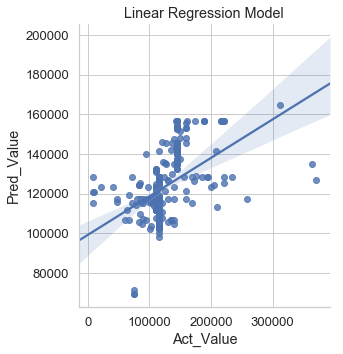

In [22]:
columns=['Act_Value','Pred_Value']
helper = pd.DataFrame([np.array(y_test),y_pred])
helper = helper.transpose()
helper.columns = columns

sns.lmplot(x='Act_Value', y='Pred_Value', data = helper);
ax = plt.gca()
ax.set_title("Linear Regression Model");


In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Shaynie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shaynie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
logreg.score(X_test, y_test)

0.7175572519083969

In [25]:
y_pred = logreg.predict(X_test)

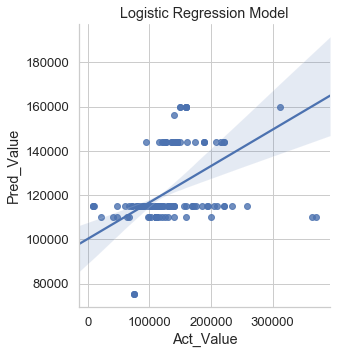

In [26]:
columns=['Act_Value','Pred_Value']
helper = pd.DataFrame([np.array(y_test),y_pred])
helper = helper.transpose()
helper.columns = columns

sns.lmplot(x='Act_Value', y='Pred_Value', data = helper);
ax = plt.gca()
ax.set_title("Logistic Regression Model");

## PCA & Clustering

C:\Users\Shaynie\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


[[0.00000000e+00 9.00000000e+00 0.00000000e+00 2.00000000e+00]
 [1.00000000e+00 4.00000000e+00 0.00000000e+00 2.00000000e+00]
 [2.00000000e+00 3.00000000e+00 0.00000000e+00 2.00000000e+00]
 ...
 [3.12900000e+03 3.13300000e+03 2.38150821e+01 6.58000000e+02]
 [3.13100000e+03 3.13200000e+03 2.76072005e+01 9.11000000e+02]
 [3.13400000e+03 3.13500000e+03 3.54852147e+01 1.56900000e+03]]


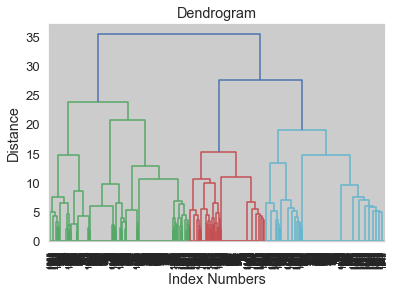

In [27]:
## Dendograme
def plot_dendogram(df):
    
    # Data prep
    X = df.as_matrix(columns=None)
    Z = linkage(X, 'ward')
    print(Z)
    
    # plotting
    plt.title('Dendrogram')
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
    )
    plt.show()
    
    
plot_dendogram(X)

In [34]:
sns.set_style("darkgrid")
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

def plot_dist_thresh(max_dist=200):
    # max_dist = 200 # pairwise distance
    # plot_dendogram(lang)
    clusters = fcluster(Z, max_dist, criterion='distance')
    
    print(("Clusters represented at distance: ", set(clusters)))
    
    # Complete color maps from matplotlib
    
    # plotting
    # Add legend with some customizations.
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))

#     ax[0].scatter(X[:,0], X[:,6], c=clusters, cmap=cm.jet, s=40)

#     ax[0].set_title("Max Dist: %d" % max_dist)
    
#     # plt.legend(clusters, loc='upper right', shadow=True, scatterpoints=1)
    
#     ax[0].legend(['c{}'.format(i) for i in range(len(clusters))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
        
    t = (0, max_dist)
    ax.plot((0, 200), (max_dist, max_dist), 'r--')
    
    ax.set_title('Dendrogram')
    ax.set_xlabel('Index Numbers')
    ax.set_ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
        #link_color_func=lambda color: cmaps['Miscellaneous'],
    )
    
def plot_wrapper(max_dist):
    plot_dist_thresh(max_dist)
    plt.show()

('Clusters represented at distance: ', {1, 2})
('Clusters represented at distance: ', {1, 2, 3, 4})
('Clusters represented at distance: ', {1, 2, 3, 4, 5, 6})


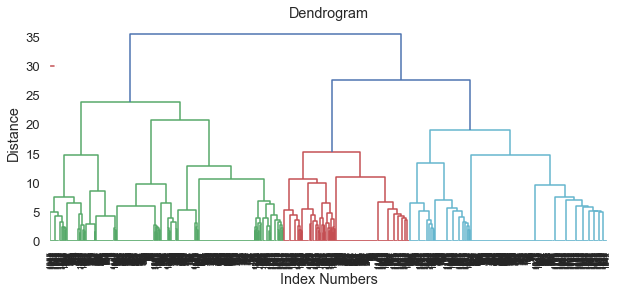

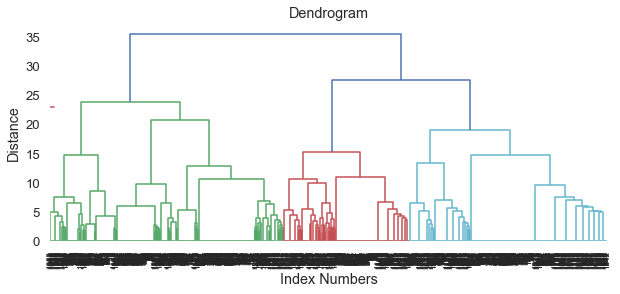

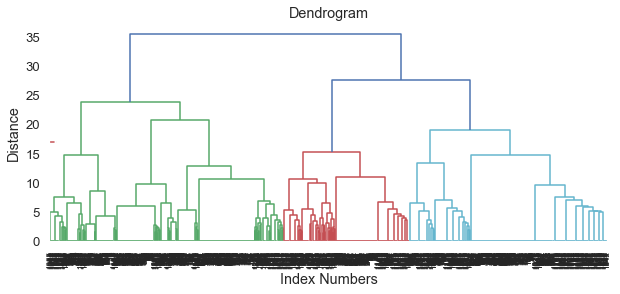

In [35]:
Z = linkage(X, 'ward')
plot_dist_thresh(30)
plot_dist_thresh(23)
plot_dist_thresh(17)

In [36]:
cluster_kmean = KMeans(n_clusters=3, random_state=0).fit(X)

predicted = cluster_kmean.labels_
centroids = cluster_kmean.cluster_centers_

print(("Predicted clusters to points: ", predicted))
print("Location of centroids: ")
print(centroids)

('Predicted clusters to points: ', array([0, 1, 1, ..., 2, 1, 2]))
Location of centroids: 
[[ 1.13953488e-01  6.74418605e-02  2.79069767e-02  5.58139535e-02
   4.72093023e-01  6.97674419e-03  4.65116279e-02  9.30232558e-02
   4.41860465e-02  7.20930233e-02  2.46511628e-01  7.53488372e-01
   4.21884749e-15  6.76744186e-01  1.51162791e-01  1.86046512e-02
   2.32558140e-03  1.27906977e-01  2.32558140e-02  2.44249065e-15
   1.00000000e+00]
 [ 4.46428571e-02  4.46428571e-02  1.42857143e-02  2.50000000e-02
   7.91071429e-01  8.92857143e-03  1.60714286e-02  2.50000000e-02
   7.14285714e-03  2.32142857e-02  1.62500000e-01  3.12500000e-01
   5.25000000e-01  6.92857143e-01  6.96428571e-02  1.96428571e-02
   1.78571429e-03  2.01785714e-01  1.42857143e-02  1.00000000e+00
   5.32907052e-15]
 [ 8.63557858e-02  1.36442142e-01  5.00863558e-02  3.62694301e-02
   4.38687392e-01  3.79965458e-02  4.14507772e-02  8.98100173e-02
   3.45423143e-02  4.83592401e-02 -5.55111512e-16  2.66453526e-15
   1.00000000

## Ensemble methods & Decision Tree Models

In [37]:
## DecisionTree
dt = DecisionTreeClassifier()

cross_val_score(dt, X_train, y_train, cv=5).mean()

C:\Users\Shaynie\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.7390516014786861

In [38]:
dt.fit(X_train, y_train)
dt.score(X_train,y_train)

0.766156462585034

In [39]:
dt.score(X_test, y_test)

0.6946564885496184

In [40]:
## BaggingClassifier
bag = BaggingClassifier(n_estimators=10000)

bag.fit(X_train, y_train)
bag.score(X_train, y_train)

0.766156462585034

In [41]:
bag.score(X_test, y_test)

0.7022900763358778

In [42]:
## RandomforestClassication
rfc = RandomForestClassifier(n_estimators=10000)

rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.766156462585034

In [43]:
rfc.score(X_test, y_test)

0.7048346055979644

In [44]:
## ExtraTrees Classification
et = ExtraTreesClassifier(n_estimators=10000)

et.fit(X_train, y_train)
et.score(X_train, y_train)

0.766156462585034

In [45]:
et.score(X_test, y_test)

0.6946564885496184

## SVM

In [46]:
def plot_svm(clf):
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                         np.arange(y_min, y_max, .2))

    # create grid to evaluate model
    xy = np.vstack([xx2.ravel(), yy2.ravel()]).T
    Z = clf.decision_function(xy).reshape(xx2.shape)

    # plot decision boundary and margins
    ax.contourf(xx2, yy2, Z, cmap=plt.cm.binary, alpha=0.2)
    ax.contour(xx2, yy2, Z, colors='k', levels=[-1, 0, 1], alpha=0.8,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if not isinstance(clf, LinearSVC):
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150,
               linewidth=1, facecolors='none', edgecolors='k')
        print (clf.support_vectors_)
        
    plt.show()
    

In [47]:
fsd=

SyntaxError: invalid syntax (<ipython-input-47-8b733072b298>, line 1)

In [49]:
def plot_svm(clf):
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                         np.arange(y_min, y_max, .2))

    # create grid to evaluate model
    xy = np.vstack([xx2.ravel(), yy2.ravel()]).T
    Z = clf.decision_function(xy).reshape(xx2.shape)

    # plot decision boundary and margins
    ax.contourf(xx2, yy2, Z, cmap=plt.cm.binary, alpha=0.2)
    ax.contour(xx2, yy2, Z, colors='k', levels=[-1, 0, 1], alpha=0.8,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if not isinstance(clf, LinearSVC):
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150,
               linewidth=1, facecolors='none', edgecolors='k')
        print (clf.support_vectors_)
        
    plt.show()
    

ValueError: X.shape[1] = 2 should be equal to 21, the number of features at training time

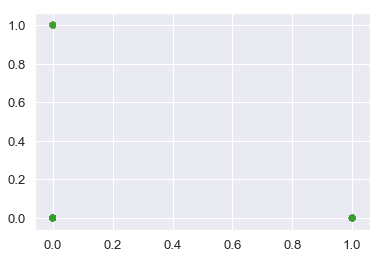

In [50]:
sv = SVC(kernel='linear', C=10000)
sv.fit(X, y)
plot_svm(sv)

C:\Users\Shaynie\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


ValueError: X.shape[1] = 2 should be equal to 21, the number of features at training time

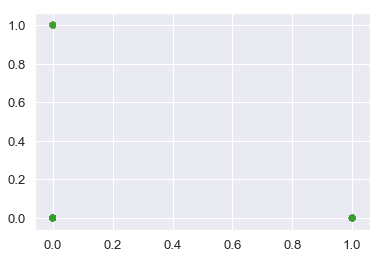

In [51]:
clf_poly = SVC(kernel='poly', degree=3, C=10000)
clf_poly.fit(X, y)
plot_svm(clf_poly)